# THE DATA

## The aim is to find  reasonable clusters of customers for marketing segmentation and study.

Source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data Analysis

In [6]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

#### There are more females than males

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

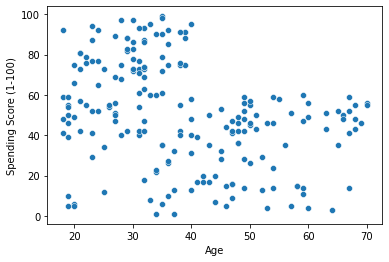

In [7]:
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)')

#### There seems to be some drop off in spending score just before the age of 40

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

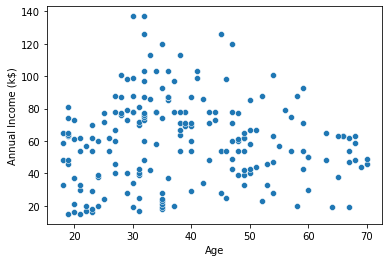

In [8]:
sns.scatterplot(data=df,y='Annual Income (k$)',x='Age')

#### The above shows the relationship between age and annual income

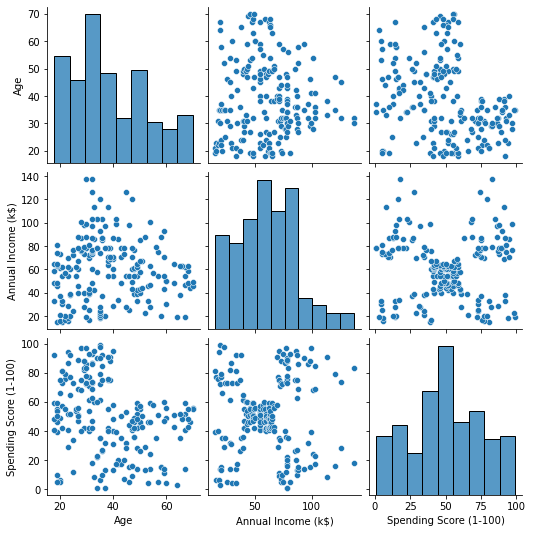

In [9]:
sns.pairplot(df.drop('CustomerID',1))

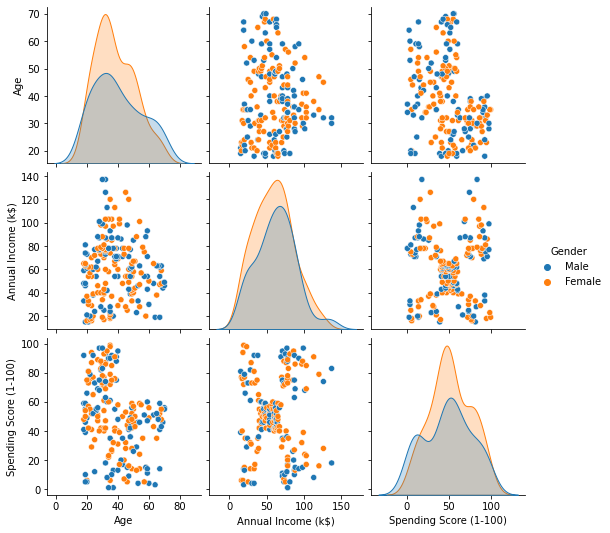

In [10]:
sns.pairplot(df.drop('CustomerID',1),hue='Gender')

#### There is no clear separation of male from female

In [11]:
df.drop('CustomerID',1).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


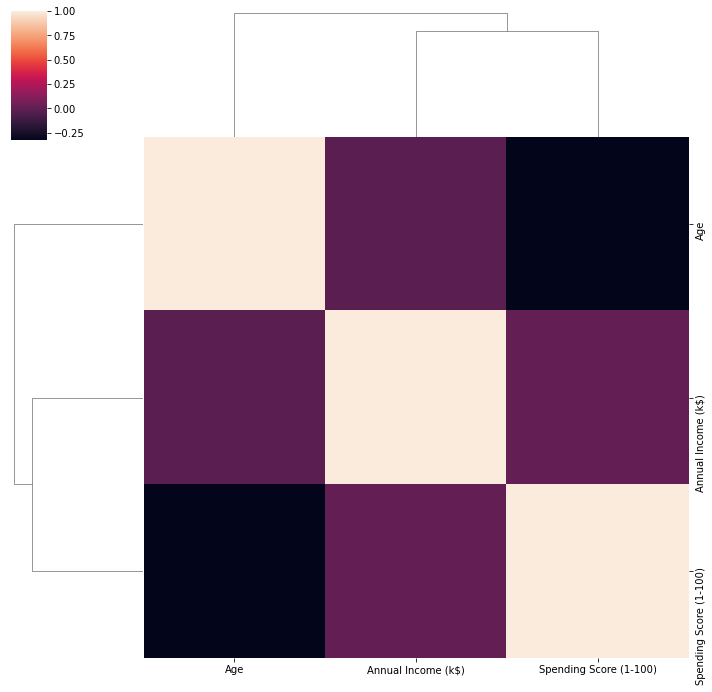

In [12]:
sns.clustermap(df.drop('CustomerID',1).corr())

#### The clustermap above shows that annual income and spending score are the two most closely correlated columns

## Data Feature Preparation and Model Discovery

In [13]:
X = df.drop("CustomerID",axis=1)

In [14]:
X = pd.get_dummies(X)

In [15]:
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


### Scaling the data because KMeans is a distance based model

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [18]:
from sklearn.cluster import KMeans

#### Using a for loop to create and fit multiple KMeans models, testing from K=2-10 clusters. Keeping track of the Sum of Squared Distances for each K value  

In [19]:
ssd = []

for k in range(2,10):
    model = KMeans(k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

In [20]:
ssd

[597.9472937932284,
 488.1952688524801,
 386.7147857740689,
 331.37863922292763,
 280.7922380096108,
 241.29753231388094,
 199.81861761323984,
 174.18800022186812]

#### plotting this out to create an "elbow" plot of K versus SSD

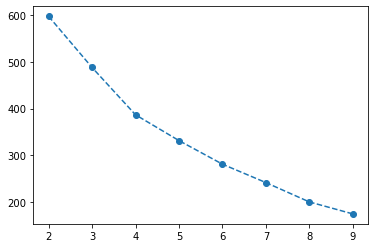

In [21]:
plt.plot(range(2,10),ssd,'o--')

#### bar plot showing the SSD difference

<AxesSubplot:>

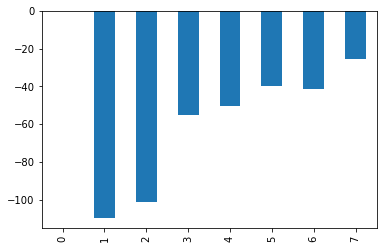

In [22]:
pd.Series(ssd).diff().plot(kind='bar')

#### There is a significant drop off in SSD difference at K=5

### Choosing k = 5 

In [23]:
model = KMeans(n_clusters=5)
model.fit(scaled_X)

KMeans(n_clusters=5)

In [24]:
model.labels_

array([1, 1, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0, 3, 0, 2, 1, 3, 1, 2, 0, 2, 1,
       3, 1, 3, 1, 3, 1, 3, 0, 2, 0, 2, 1, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0,
       3, 0, 3, 0, 0, 0, 3, 1, 0, 2, 3, 2, 3, 2, 0, 2, 2, 1, 3, 3, 2, 1,
       3, 3, 1, 0, 2, 3, 3, 3, 2, 1, 3, 2, 0, 3, 2, 1, 2, 3, 0, 2, 3, 0,
       0, 3, 3, 1, 2, 3, 0, 1, 3, 0, 2, 1, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2,
       2, 0, 3, 1, 0, 0, 3, 3, 3, 3, 1, 3, 0, 1, 0, 0, 4, 1, 2, 1, 4, 1,
       0, 0, 4, 0, 3, 1, 4, 0, 3, 1, 0, 0, 4, 1, 4, 0, 3, 1, 4, 1, 3, 0,
       3, 0, 4, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 3, 1, 4, 1, 4, 1, 3, 0,
       4, 1, 4, 1, 3, 0, 4, 0, 3, 1, 3, 1, 3, 0, 3, 0, 4, 0, 3, 0, 3, 1,
       4, 1])

In [25]:
X['K=5 labels'] = model.labels_

In [26]:
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,K=5 labels
0,19,15,39,0,1,1
1,21,15,81,0,1,1
2,20,16,6,1,0,3
3,23,16,77,1,0,0
4,31,17,40,1,0,0
...,...,...,...,...,...,...
195,35,120,79,1,0,0
196,45,126,28,1,0,3
197,32,126,74,0,1,1
198,32,137,18,0,1,4


In [27]:
abs(X.corr()['K=5 labels']).sort_values()

Annual Income (k$)        0.126089
Gender_Male               0.181426
Gender_Female             0.181426
Age                       0.547921
Spending Score (1-100)    0.713280
K=5 labels                1.000000
Name: K=5 labels, dtype: float64

<AxesSubplot:>

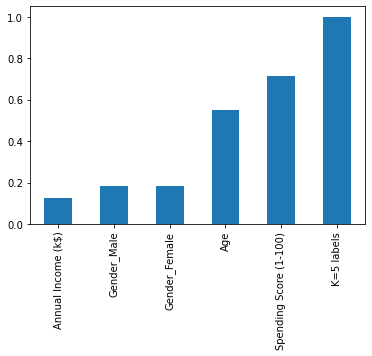

In [28]:
abs(X.corr()['K=5 labels']).sort_values().plot(kind='bar')

#### correlation of columns to the cluster labels

In [29]:
import joblib

In [30]:
joblib.dump(model,'model.pkl')

['model.pkl']